<a href="https://colab.research.google.com/github/huy20146177/baitapAI/blob/main/USA_Housing.csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sas
from sklearn.preprocessing import  StandardScaler as S_scaler
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR

In [2]:
data = pd.read_csv('USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
data = data.drop(data.columns[[0,6]], axis = 1)
y = data['Price']
data.head()

,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,5.040555,7.839388,4.23,26354.109472,6.309435e+05


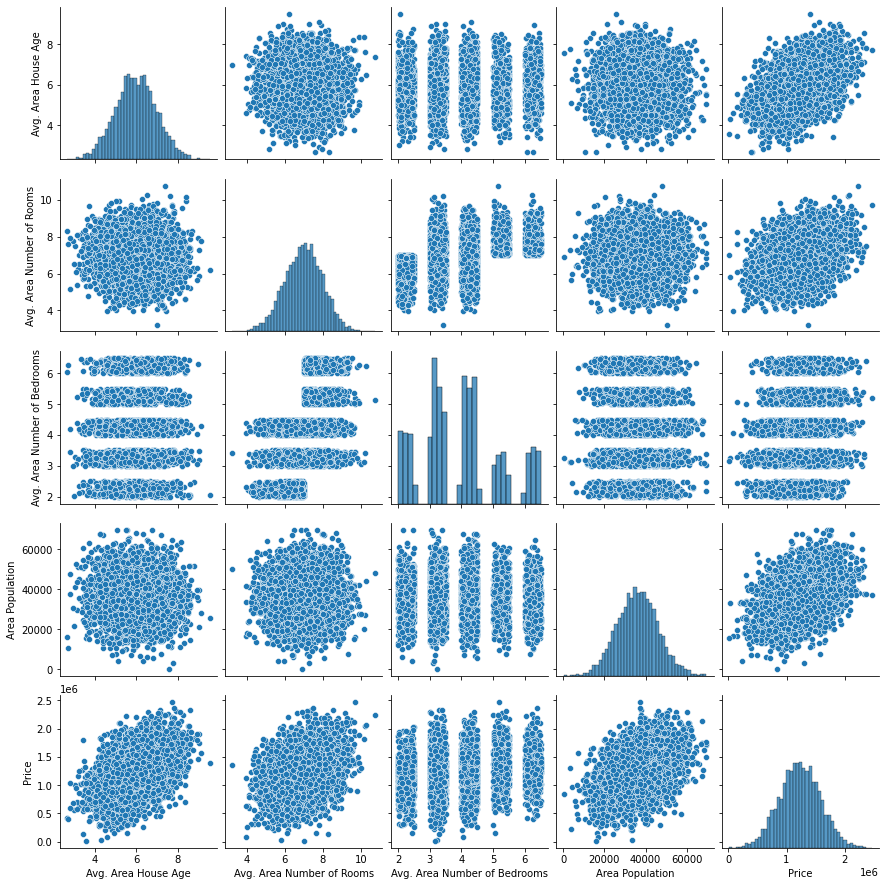

In [4]:
sas.pairplot(data)          #vẽ các mối tương quan giữa các cặp nghiệm 

<Axes: >

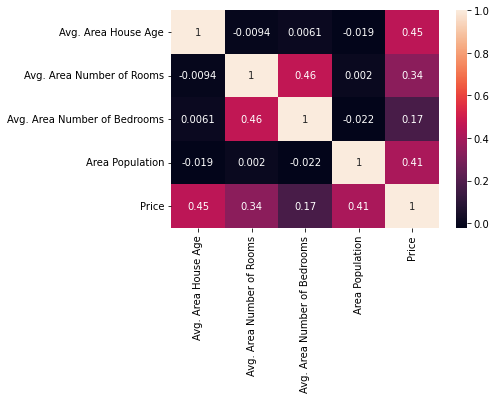

In [5]:
#Biểu đồ nhiệt thể hiện thay thế cho ma trận correlation
corr = data.corr()
sas.heatmap(corr,annot = True)

In [6]:
#Su dung data der train cho AI
x = data.drop(data.columns[[4]], axis = 1)
sc = S_scaler()
x = sc.fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
x_train.shape

(4000, 4)

In [8]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
x_test.shape

(1000, 4)

In [9]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
y_train.shape

(4000,)

In [10]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)
y_test.shape

(1000,)

In [11]:
#kiem tra lai do chinh xac sau khi train
regression = LR()
regression.fit(x_train, y_train)
y_pred = regression.predict(x_test).round(1)

calculation = pd.DataFrame(np.c_[y_test, y_pred], columns = ['Original Price','Predicted Price'])
print('Do chinh xac cua train:',regression.score(x_train, y_train))
print('Do chinh xac cua test:',regression.score(x_test, y_test))

Do chinh xac cua train: 0.4919209985053705
Do chinh xac cua test: 0.503743625896899
